# Analysis new simulations of 10M Muons
In this notebook, we analyze the new simulations by CJ.
He has simulated 10M muons with a new geometry (*introducing ROI volume to force intermediate steps and avoiding the pileup of energy of particles entering/leaving the ROI*).
Moreover, we reprocess also the Ar39 simulations with `Q.E.=0.20`.

In [52]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 25})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_08_18_2020", "Ar39_Snapshots")

fileinprefix = "Snapshot1Ar39*.csv"
df_1ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_1ar39 = df_1ar39[df_1ar39.columns[:-1]]

fileinprefix = "Snapshot3Ar39*.csv"
df_3ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_3ar39 = df_3ar39[df_3ar39.columns[:-1]]

fileinprefix = "Snapshot5Ar39*.csv"
df_5ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_5ar39 = df_5ar39[df_5ar39.columns[:-1]]

fileinprefix = "Snapshot7Ar39*.csv"
df_7ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_7ar39 = df_7ar39[df_7ar39.columns[:-1]]

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot3Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot5Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot7Ar39*.csv
...................................................................................................


In [4]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_08_18_2020", "Muons_Snapshots")
fileinprefix = "SnapshotMuon*.csv"

df_mu = load_dataframe_from_files(dirin, fileinprefix)
df_mu = df_mu[df_mu.columns[:-1]]

[Info] Loading 100 files wt prefix:
SnapshotMuon*.csv
...................................................................................................


In [5]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_Old", "Muons_Snapshots")
fileinprefix = "SnapshotOldMuon*.csv"

df_oldmu = load_dataframe_from_files(dirin, fileinprefix)
df_oldmu = df_oldmu[df_oldmu.columns[:-1]]

[Info] Loading 100 files wt prefix:
SnapshotOldMuon*.csv
...................................................................................................


In [6]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_08_18_2020", "Neutrons_Snapshots")
fileinprefix = "SnapshotAr41*WholeCylinder.csv"

df_ne = load_dataframe_from_files(dirin, fileinprefix)
df_ne = df_ne[df_ne.columns[:-1]]

[Info] Loading 1 files wt prefix:
SnapshotAr41*WholeCylinder.csv



In [7]:
print("[Info] Loaded {} 1 Ar39 decays, with maximum {} PE detected".format(len(df_1ar39), df_1ar39.pedetected.max()))
print("[Info] Loaded {} 3 Ar39 decays, with maximum {} PE detected".format(len(df_3ar39), df_3ar39.pedetected.max()))
print("[Info] Loaded {} 5 Ar39 decays, with maximum {} PE detected".format(len(df_5ar39), df_5ar39.pedetected.max()))
print("[Info] Loaded {} 7 Ar39 decays, with maximum {} PE detected".format(len(df_7ar39), df_7ar39.pedetected.max()))
print()
print("[Info] Loaded {} Muons, with maximum {} PE detected (OLD 2M RUN)".format(len(df_oldmu), df_oldmu.pedetected.max()))
print("[Info] Loaded {} Muons, with maximum {} PE detected (NEW 10M RUN)".format(len(df_mu), df_mu.pedetected.max()))
print()
print("[Info] Loaded {} Ar41, with maximum {} PE detected (FROM NEUTRON SIM)".format(len(df_ne), df_ne.pedetected.max()))


[Info] Loaded 5303515 1 Ar39 decays, with maximum 30 PE detected
[Info] Loaded 1767809 3 Ar39 decays, with maximum 40 PE detected
[Info] Loaded 1060664 5 Ar39 decays, with maximum 55 PE detected
[Info] Loaded 757599 7 Ar39 decays, with maximum 58 PE detected

[Info] Loaded 13793 Muons, with maximum 430933 PE detected (OLD 2M RUN)
[Info] Loaded 157057 Muons, with maximum 2011444 PE detected (NEW 10M RUN)

[Info] Loaded 3208 Ar41, with maximum 125 PE detected (FROM NEUTRON SIM)


In [8]:
# check cut 5 pe
cut_pe = 5
print("[Info] 1 Ar39 decays, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_1ar39[df_1ar39.pedetected<cut_pe]), len(df_1ar39[df_1ar39.pedetected<cut_pe])/len(df_1ar39)*100))
print("[Info] 3 Ar39 decays, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_3ar39[df_3ar39.pedetected<cut_pe]), len(df_3ar39[df_3ar39.pedetected<cut_pe])/len(df_3ar39)*100))
print("[Info] 5 Ar39 decays, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_5ar39[df_5ar39.pedetected<cut_pe]), len(df_5ar39[df_5ar39.pedetected<cut_pe])/len(df_5ar39)*100))
print("[Info] 7 Ar39 decays, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_7ar39[df_7ar39.pedetected<cut_pe]), len(df_7ar39[df_7ar39.pedetected<cut_pe])/len(df_7ar39)*100))
print()
print("[Info] OLD Muons, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_oldmu[df_oldmu.pedetected<cut_pe]), len(df_oldmu[df_oldmu.pedetected<cut_pe])/len(df_oldmu)*100))
print("[Info] NEW Muons, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_mu[df_mu.pedetected<cut_pe]), len(df_mu[df_mu.pedetected<cut_pe])/len(df_mu)*100))
print()
print("[Info] Ar41, cut {} PE: {} events discarded ({:.3f} %)".format(cut_pe, len(df_ne[df_ne.pedetected<cut_pe]), len(df_ne[df_ne.pedetected<cut_pe])/len(df_ne)*100))

[Info] 1 Ar39 decays, cut 5 PE: 4841594 events discarded (91.290 %)
[Info] 3 Ar39 decays, cut 5 PE: 623829 events discarded (35.288 %)
[Info] 5 Ar39 decays, cut 5 PE: 0 events discarded (0.000 %)
[Info] 7 Ar39 decays, cut 5 PE: 0 events discarded (0.000 %)

[Info] OLD Muons, cut 5 PE: 2019 events discarded (14.638 %)
[Info] NEW Muons, cut 5 PE: 22977 events discarded (14.630 %)

[Info] Ar41, cut 5 PE: 1407 events discarded (43.859 %)


### Observations: 
#### Ar39 Detection Probability
Considering a `Q.E.=0.20`, we observe a lower Detection Probability (as expected).

In the previous simulations wt `Q.E.=0.40`, we had more than 6M events wt `NPE>0`. Then, the detection probability was about `64.17%`.

Now, using `Q.E.=0.20`, we have 5M events wt `NPE>0`. Then, the detection probability was about `53.04%`.

Referring to the preliminary estimation on the **expected trigger rate**, we update it as `E[decay rate] * Det.Pr = 3666 * .5304 = 1945 Hz`.

#### Number of Mu events
In the first Muons run, CJ simulated `2M` muons and about `14K` events present a non-zero detection (`.75%`).
These data (*dataframe df_oldmu*) have been recomputed wt the same `Q.E.=0.20`.

Now, having introduced a larger sample of MUSUN starting conditions (*sampling from 26M musun instances*), we obtain a statistics larger than expected. 
In fact, it has more than `150K` events with non-zero detection for `10M` simulations (`1.6%`).

Considering the increase of the simulated data `x5`, we expect also the increase in the number of events of `x5`.
Conversely, the increase of events is more than `x10`.

# Plot PE Spectrum

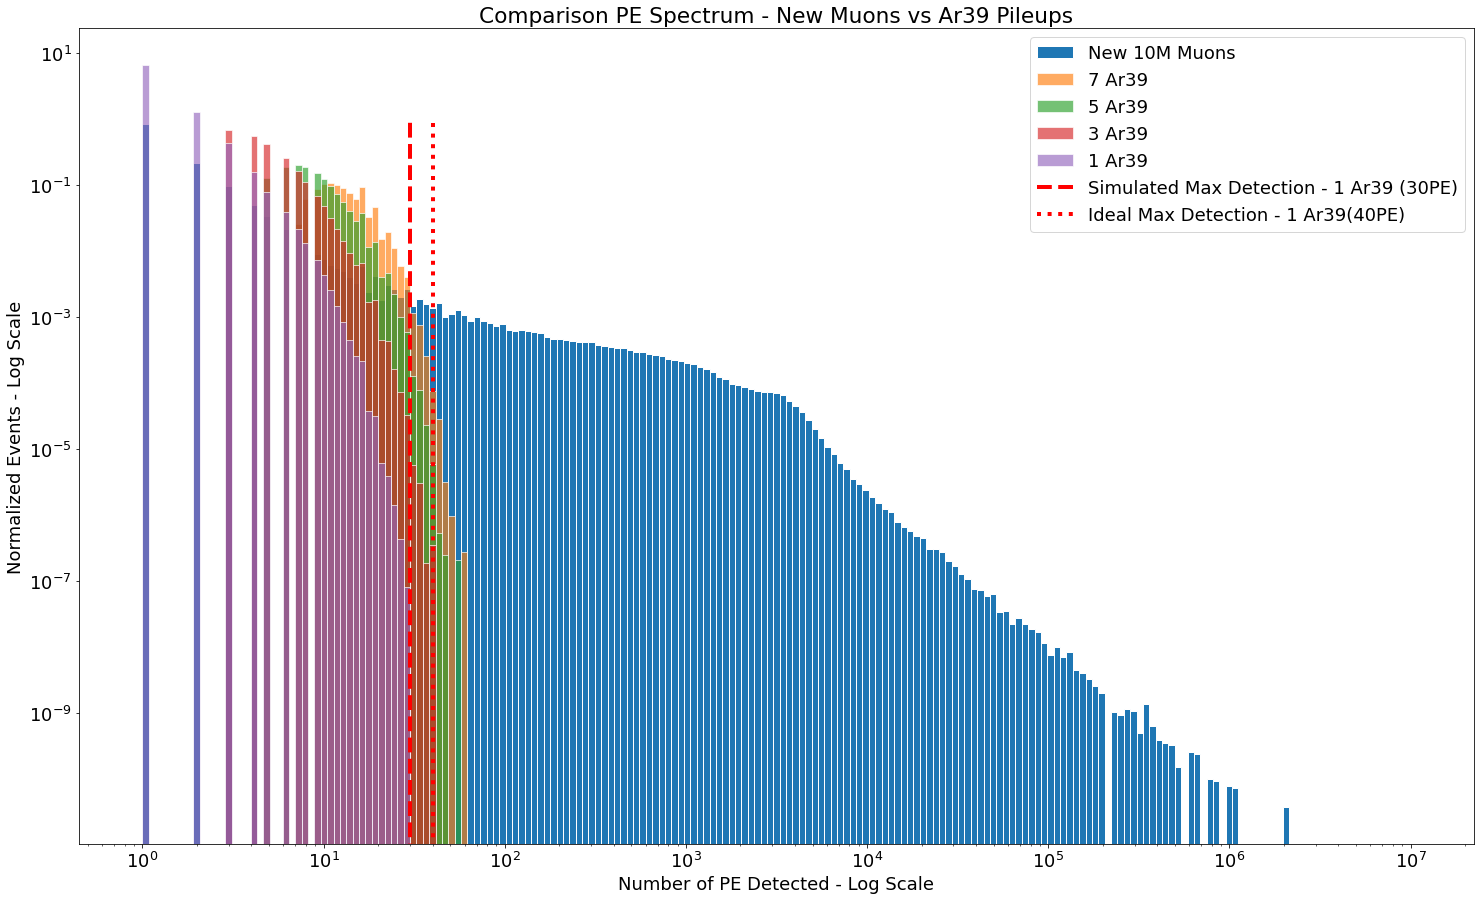

In [40]:
bins = np.logspace(0, 7, 200)
alpha = .65
plt.hist(df_mu.pedetected, bins=bins, label="New 10M Muons", density=True, edgecolor='w')
plt.hist(df_7ar39.pedetected, bins=bins, label="7 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(df_5ar39.pedetected, bins=bins, label="5 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(df_3ar39.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(df_1ar39.pedetected, bins=bins, label="1 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.vlines(30, 0, 1, label="Simulated Max Detection - 1 Ar39 (30PE)", color="red", linestyles="dashed", linewidth=4)
plt.vlines(40, 0, 1, label="Ideal Max Detection - 1 Ar39(40PE)", color="red", linestyles="dotted", linewidth=4)
plt.yscale("log")
plt.xscale("log")
plt.title("Comparison PE Spectrum - New Muons vs Ar39 Pileups")
plt.xlabel("Number of PE Detected - Log Scale")
plt.ylabel("Normalized Events - Log Scale")
plt.legend(loc='upper right')
plt.show()

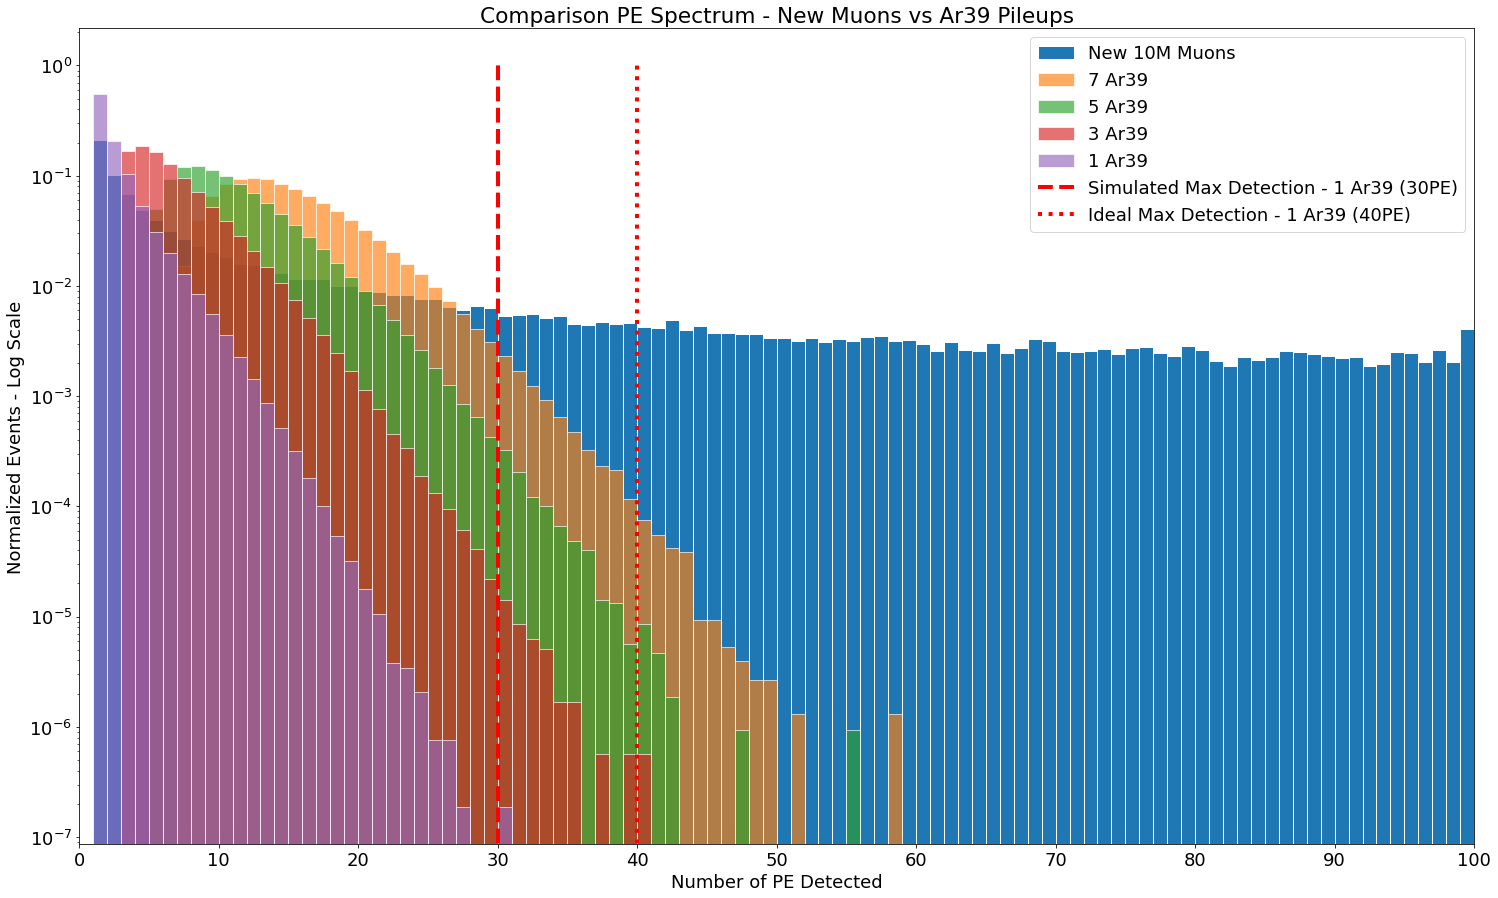

In [42]:
bins = np.linspace(0, 100, 101)
plt.xlim(0, 100)
alpha = .65
plt.hist(df_mu.pedetected, bins=bins, label="New 10M Muons", density=True, edgecolor='w')
plt.hist(df_7ar39.pedetected, bins=bins, label="7 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(df_5ar39.pedetected, bins=bins, label="5 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(df_3ar39.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(df_1ar39.pedetected, bins=bins, label="1 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.vlines(30, 0, 1, label="Simulated Max Detection - 1 Ar39 (30PE)", color="red", linestyles="dashed", linewidth=4)
plt.vlines(40, 0, 1, label="Ideal Max Detection - 1 Ar39 (40PE)", color="red", linestyles="dotted", linewidth=4)
plt.yscale("log")
plt.title("Comparison PE Spectrum - New Muons vs Ar39 Pileups")
plt.xlabel("Number of PE Detected")
plt.ylabel("Normalized Events - Log Scale")
plt.legend(loc='upper right')
plt.xticks(range(0, 101, 10))
plt.show()

# Comparison Spread

In [10]:
import time

# Create Features
def pe_detected(row):
    return np.sum(row.to_numpy())

def nr_active_slices(row):
    return np.nonzero(row.to_numpy())[0].shape[0]

def mean_npe(row):
    return np.mean(row.to_numpy())

def mean_npe_active(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return np.mean(rownp[rownonzero]) if rownonzero.shape[0]>0 else -1

def std_npe(row):
    return np.std(row.to_numpy())

def std_npe_active(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return np.std(rownp[rownonzero]) if rownonzero.shape[0]>0 else -1

def range_detections(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return rownonzero[-1] - rownonzero[0] + 1 if rownonzero.shape[0]>0 else -1

def spatial_var(row):
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.var(ids) if ids.shape[0]>0 else -1

def spatial_std(row):
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.std(ids) if ids.shape[0]>0 else -1

def compute_features(row):
    rownp = row.to_numpy()
    return [np.sum(rownp),                        # NPE
            np.nonzero(rownp)[0].shape[0],        # NActiveSlices
            np.mean(rownp),                       # Mean NPE
            np.std(rownp),                        # Std NPE
            np.nonzero(rownp)[0][-1] - np.nonzero(rownp)[0][0] + 1,    # Range
            np.var(np.repeat(np.argwhere(rownp>0), rownp[rownp>0])),   # Var
            np.std(np.repeat(np.argwhere(rownp>0), rownp[rownp>0]))]   # Var   

In [11]:
init = time.time()
skip_first_col = 3
n_inner_slices, n_outer_slices = 12, 20
df_1ar39_feat = pd.DataFrame()
df_1ar39_feat["PEDetected_tot"] = df_1ar39.pedetected
df_1ar39_feat["PEDetected_inner"] = df_1ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_1ar39_feat["PEDetected_outer"] = df_1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_1ar39_feat["SpatialStd_inner"] = df_1ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_1ar39_feat["SpatialStd_outer"] = df_1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 574.832 sec


In [12]:
init = time.time()
df_mu_feat = pd.DataFrame()
df_mu_feat["PEDetected_tot"] = df_mu.pedetected
df_mu_feat["PEDetected_inner"] = df_mu.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_mu_feat["PEDetected_outer"] = df_mu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_mu_feat["SpatialStd_inner"] = df_mu.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_mu_feat["SpatialStd_outer"] = df_mu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 22.627 sec


In [27]:
init = time.time()
df_oldmu_feat = pd.DataFrame()
df_oldmu_feat["PEDetected_tot"] = df_oldmu.pedetected
df_oldmu_feat["PEDetected_inner"] = df_oldmu.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_oldmu_feat["PEDetected_outer"] = df_oldmu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_oldmu_feat["SpatialStd_inner"] = df_oldmu.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_oldmu_feat["SpatialStd_outer"] = df_oldmu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
df_oldmu_feat["NActiveSlices_inner"] = df_oldmu.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_oldmu_feat["NActiveSlices_outer"] = df_oldmu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 2.287 sec


In [13]:
init = time.time()
df_mu_feat["NActiveSlices_inner"] = df_mu.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_mu_feat["NActiveSlices_outer"] = df_mu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 2.521 sec


In [14]:
init = time.time()
df_1ar39_feat["NActiveSlices_inner"] = df_1ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_1ar39_feat["NActiveSlices_outer"] = df_1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 88.493 sec


In [15]:
init = time.time()
df_3ar39_feat = pd.DataFrame()
df_3ar39_feat["PEDetected_tot"] = df_3ar39.pedetected
df_3ar39_feat["PEDetected_inner"] = df_3ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_3ar39_feat["PEDetected_outer"] = df_3ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_3ar39_feat["SpatialStd_inner"] = df_3ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_3ar39_feat["SpatialStd_outer"] = df_3ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 217.393 sec


In [16]:
init = time.time()
df_5ar39_feat = pd.DataFrame()
df_5ar39_feat["PEDetected_tot"] = df_5ar39.pedetected
df_5ar39_feat["PEDetected_inner"] = df_5ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_5ar39_feat["PEDetected_outer"] = df_5ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_5ar39_feat["SpatialStd_inner"] = df_5ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_5ar39_feat["SpatialStd_outer"] = df_5ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 139.763 sec


In [17]:
init = time.time()
df_7ar39_feat = pd.DataFrame()
df_7ar39_feat["PEDetected_tot"] = df_7ar39.pedetected
df_7ar39_feat["PEDetected_inner"] = df_7ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_7ar39_feat["PEDetected_outer"] = df_7ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_7ar39_feat["SpatialStd_inner"] = df_7ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_7ar39_feat["SpatialStd_outer"] = df_7ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 101.776 sec


# Comparison Detections in Inner and Outer Shrouds
Expectations: 
1. Since Ar39 is isotropically spread, we expect the same distribution over the inner and outer shrouds. In fact, an Ar39 decay could happen within the inner region or outside, however the overall distribution would be similar.
1. Conversely, Muons follows precise patterns defined by the muon trajectory and other processes (e.g. scattering, ionization). Then, since the muons start from the outer region, we expect a more intense activation of the outer shroud.

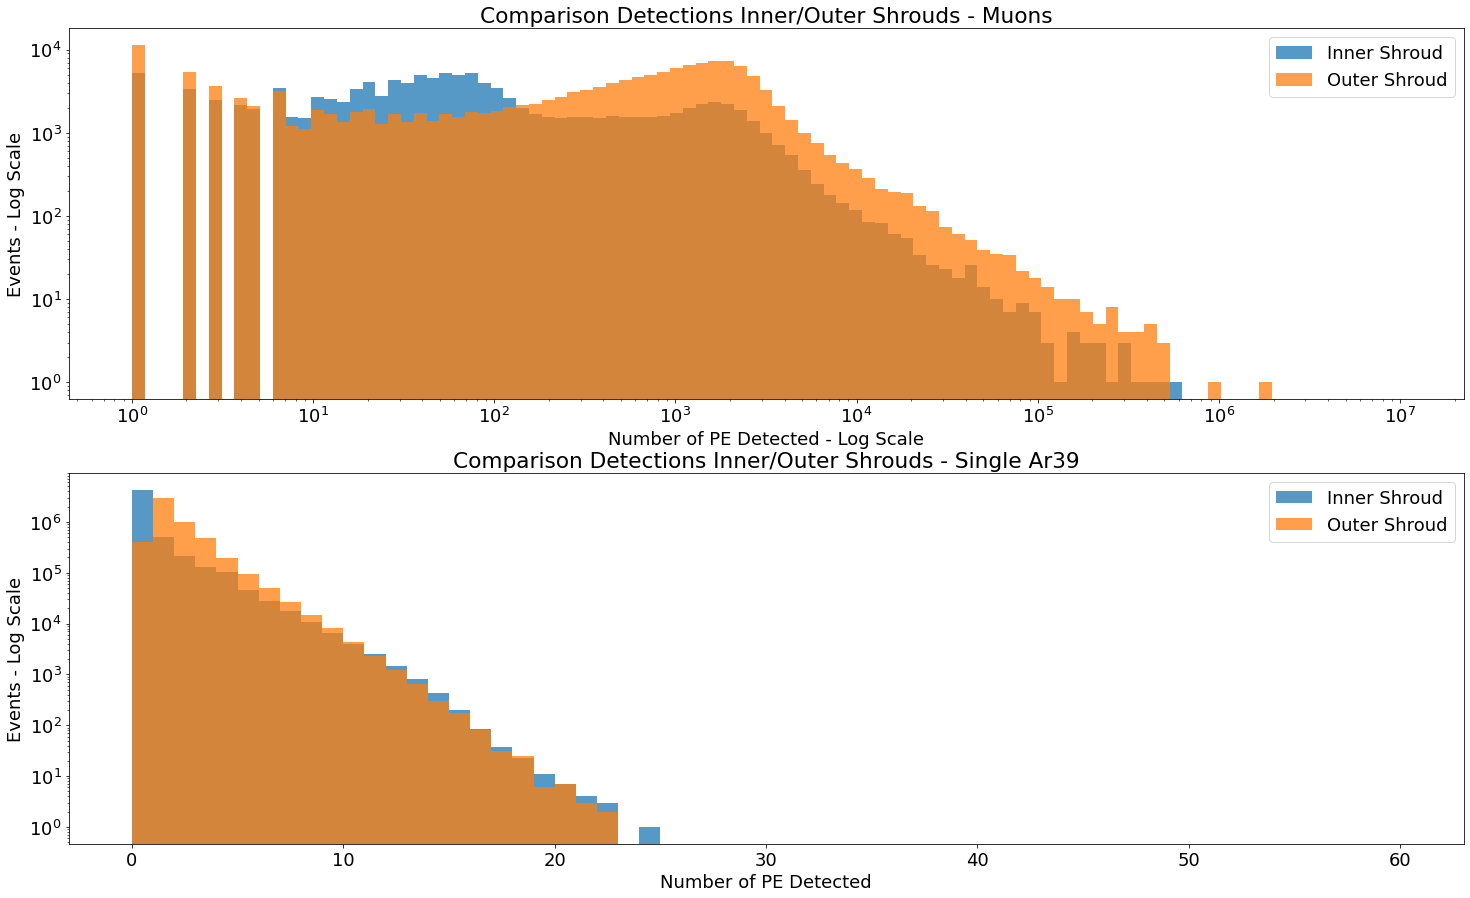

In [18]:
bins = np.logspace(0, 7, 100)
alpha = 0.75
plt.subplot(2, 1, 1)
plt.hist(df_mu_feat.PEDetected_inner, bins=bins, label="Inner Shroud", density=False, alpha=alpha)
plt.hist(df_mu_feat.PEDetected_outer, bins=bins, label="Outer Shroud", density=False, alpha=alpha)
plt.title("Comparison Detections Inner/Outer Shrouds - Muons")
plt.xlabel("Number of PE Detected - Log Scale")
plt.ylabel("Events - Log Scale")
plt.xscale("log")
plt.yscale("log")
plt.legend()

bins = np.linspace(0, 60, 61)
plt.subplot(2, 1, 2)
plt.hist(df_1ar39_feat.PEDetected_inner, bins=bins, label="Inner Shroud", density=False, alpha=alpha)
plt.hist(df_1ar39_feat.PEDetected_outer, bins=bins, label="Outer Shroud", density=False, alpha=alpha)
plt.title("Comparison Detections Inner/Outer Shrouds - Single Ar39")
plt.xlabel("Number of PE Detected")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()

plt.show()

# Comparison detecions for Low-Energy Muons [0,60] PE

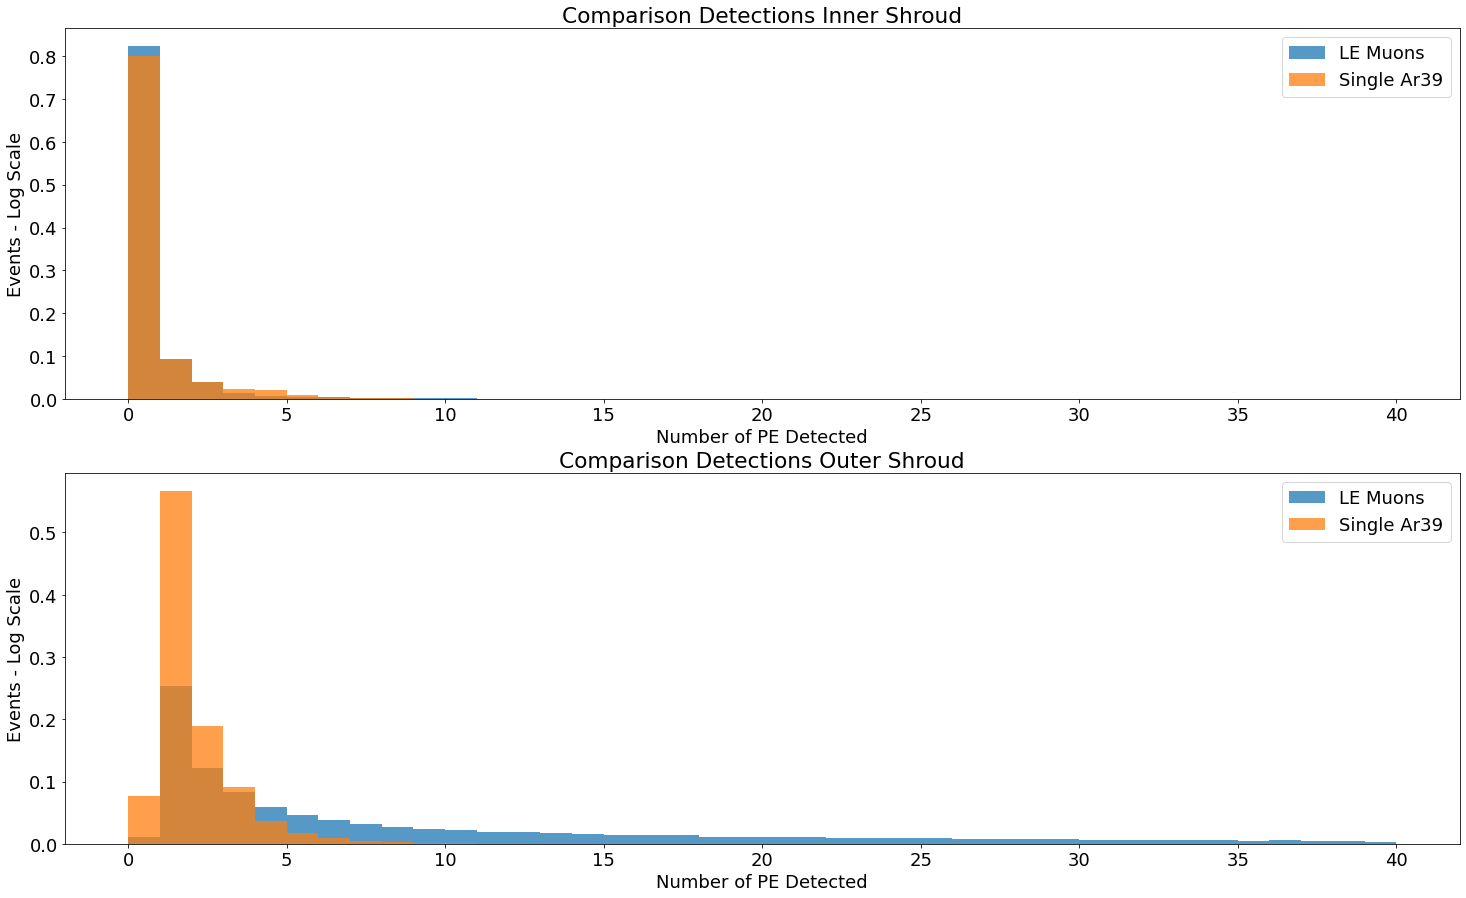

In [19]:
max_pe_lem = 40
bins = np.linspace(0, max_pe_lem, max_pe_lem+1)

plt.subplot(2, 1, 1)
plt.hist(df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].PEDetected_inner, bins=bins, label="LE Muons", density=True, alpha=alpha)
plt.hist(df_1ar39_feat.PEDetected_inner, bins=bins, label="Single Ar39", density=True, alpha=alpha)
plt.title("Comparison Detections Inner Shroud")
plt.xlabel("Number of PE Detected")
plt.ylabel("Events - Log Scale")
#plt.yscale("log")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].PEDetected_outer, bins=bins, label="LE Muons", density=True, alpha=alpha)
plt.hist(df_1ar39_feat.PEDetected_outer, bins=bins, label="Single Ar39", density=True, alpha=alpha)
plt.title("Comparison Detections Outer Shroud")
plt.xlabel("Number of PE Detected")
plt.ylabel("Events - Log Scale")
#plt.yscale("log")
plt.legend()

plt.show()

# Comparison Spatial Spread Inner/Outer Shroud
Expectations:
1. Ar39 decays would be strongly localized when occur in the outer region, whilst widely spread when occur in the inner region.
1. Low-energy Muons would have a localized spread in the outer region.

In [20]:
df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].SpatialStd_inner.describe()

count    44518.000000
mean        -0.669556
std          0.923662
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max          5.500000
Name: SpatialStd_inner, dtype: float64

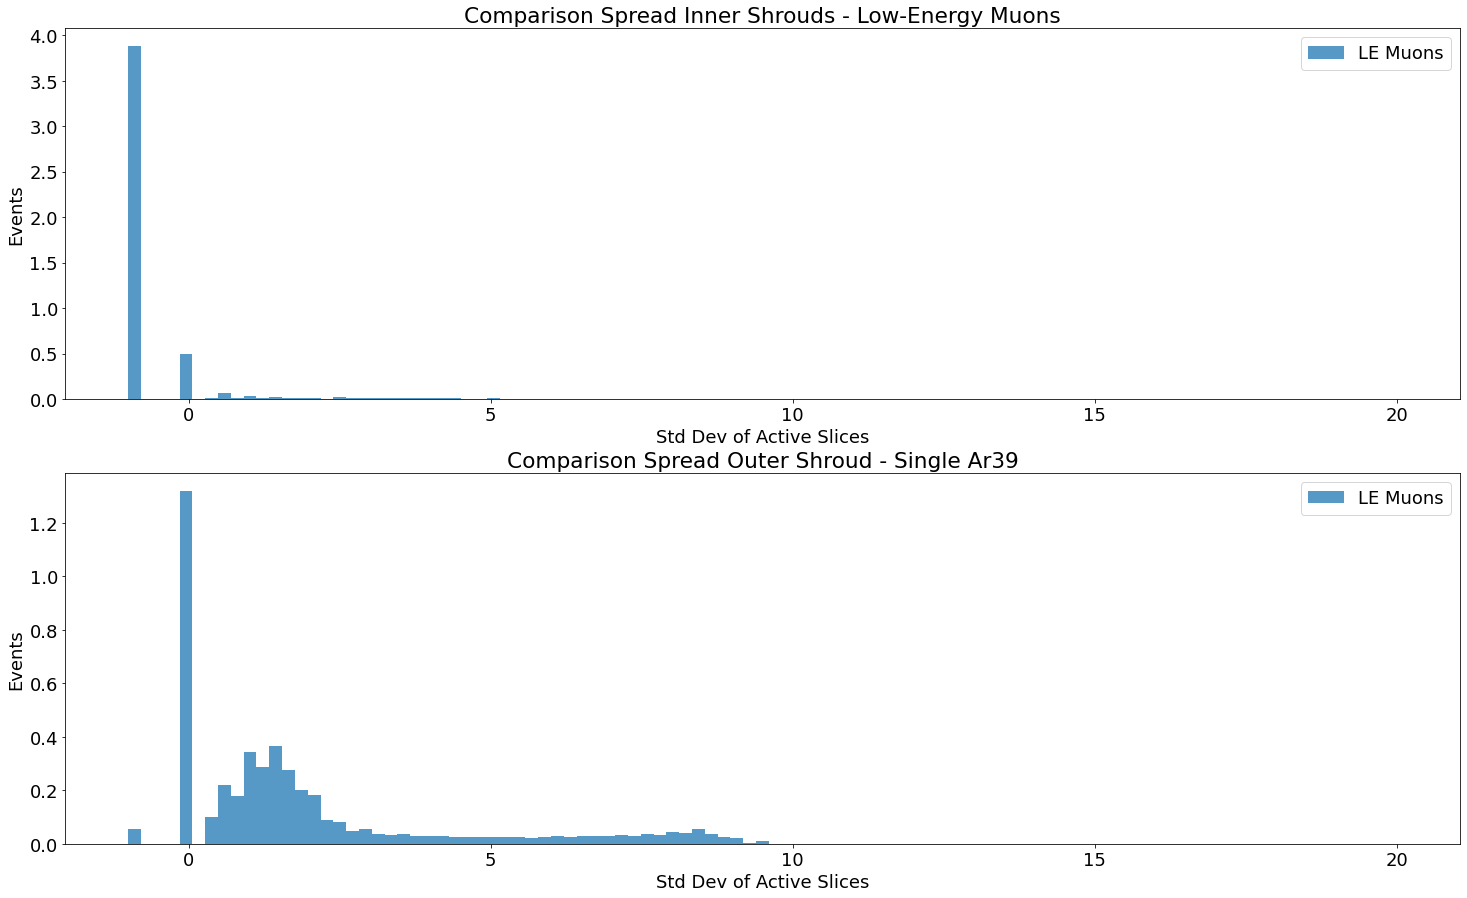

In [30]:
bins = np.linspace(-1, 20, 100)
alpha = 0.75
plt.subplot(2, 1, 1)
#plt.hist(df_1ar39_feat.SpatialStd_inner, bins=bins, label="1 Ar39", density=True, alpha=alpha)
#plt.hist(df_3ar39_feat.SpatialStd_inner, bins=bins, label="3 Ar39", density=True, alpha=alpha)
#plt.hist(df_5ar39_feat.SpatialStd_inner, bins=bins, label="5 Ar39", density=True, alpha=alpha)
#plt.hist(df_7ar39_feat.SpatialStd_inner, bins=bins, label="7 Ar39", density=True, alpha=alpha)
plt.hist(df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].SpatialStd_inner, bins=bins, label="LE Muons", density=True, alpha=alpha)
plt.title("Comparison Spread Inner Shrouds - Low-Energy Muons")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Events")
plt.legend()

plt.subplot(2, 1, 2)
#plt.hist(df_1ar39_feat.SpatialStd_outer, bins=bins, label="1 Ar39", density=True, alpha=alpha)
#plt.hist(df_3ar39_feat.SpatialStd_outer, bins=bins, label="3 Ar39", density=True, alpha=alpha)
#plt.hist(df_5ar39_feat.SpatialStd_outer, bins=bins, label="5 Ar39", density=True, alpha=alpha)
#plt.hist(df_7ar39_feat.SpatialStd_outer, bins=bins, label="7 Ar39", density=True, alpha=alpha)
plt.hist(df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].SpatialStd_outer, bins=bins, label="LE Muons", density=True, alpha=alpha)
plt.title("Comparison Spread Outer Shroud - Single Ar39")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Events")
plt.legend()

plt.show()

# Comparison Number of Active Slices

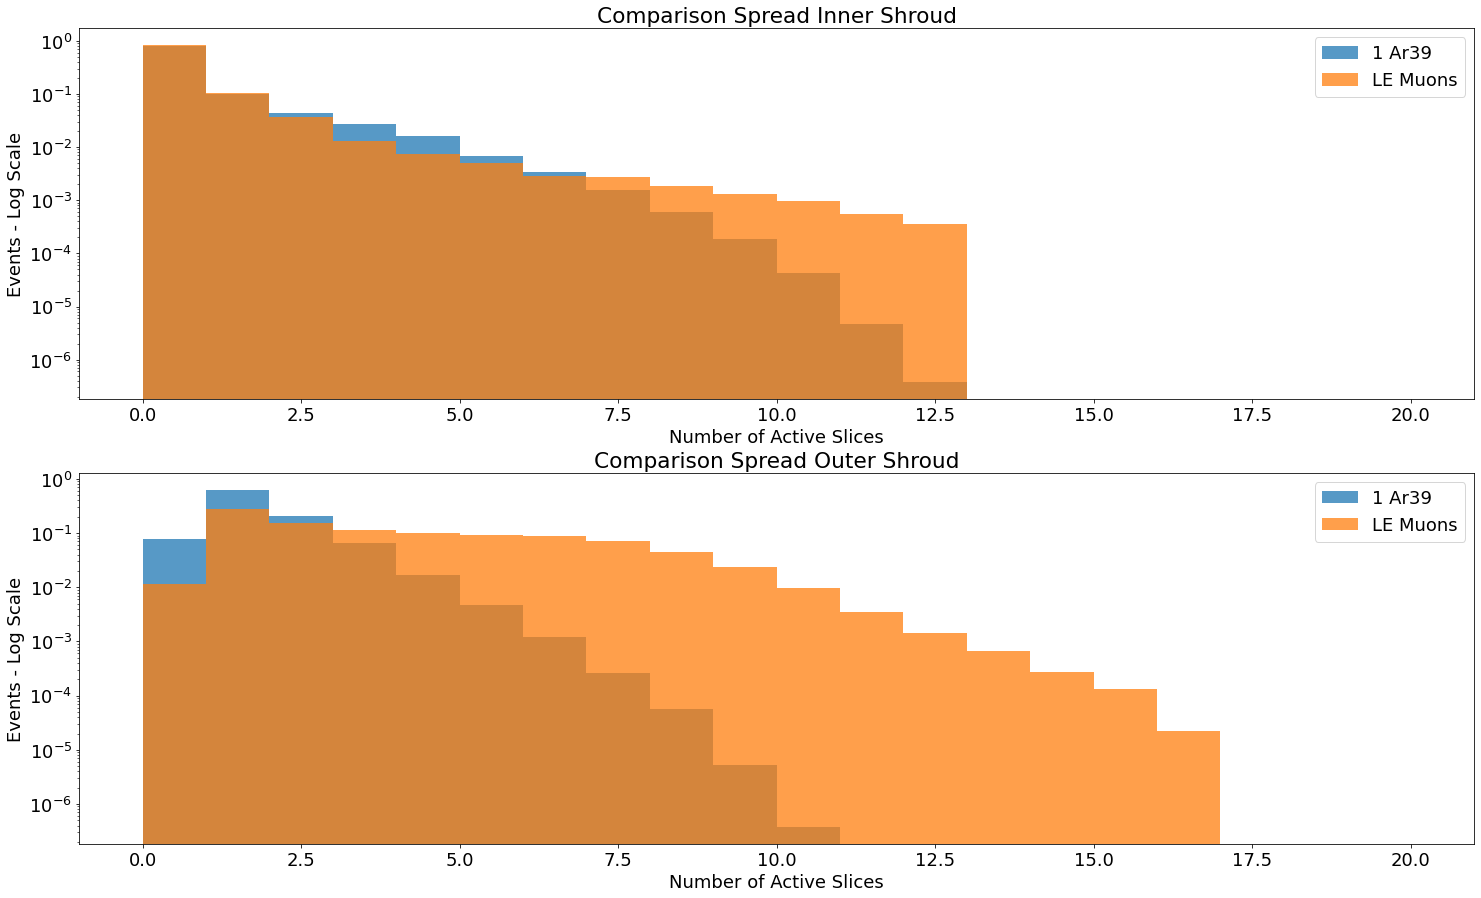

In [22]:
bins = np.linspace(0, 20, 21)
alpha = 0.75
plt.subplot(2, 1, 1)
plt.hist(df_1ar39_feat.NActiveSlices_inner, bins=bins, label="1 Ar39", density=True, alpha=alpha)
plt.hist(df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].NActiveSlices_inner, bins=bins, label="LE Muons", density=True, alpha=alpha)
plt.title("Comparison Spread Inner Shroud")
plt.xlabel("Number of Active Slices")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(df_1ar39_feat.NActiveSlices_outer, bins=bins, label="1 Ar39", density=True, alpha=alpha)
plt.hist(df_mu_feat[df_mu_feat.PEDetected_tot<=max_pe_lem].NActiveSlices_outer, bins=bins, label="LE Muons", density=True, alpha=alpha)
plt.title("Comparison Spread Outer Shroud")
plt.xlabel("Number of Active Slices")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()

plt.show()

# Compare Single Ar39 data before/after correction on the use of spatial map

In [32]:
# Compare with old Ar39
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_07_31_2020", "Ar39_Snapshots")

fileinprefix = "Snapshot1Ar39*.csv"
df_old1ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_old1ar39 = df_old1ar39[df_1ar39.columns[:-1]]

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*.csv
...................................................................................................


In [33]:
init = time.time()
df_old1ar39_feat = pd.DataFrame()
df_old1ar39_feat["PEDetected_tot"] = df_old1ar39.pedetected
df_old1ar39_feat["PEDetected_inner"] = df_old1ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_old1ar39_feat["PEDetected_outer"] = df_old1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_old1ar39_feat["SpatialStd_inner"] = df_old1ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_old1ar39_feat["SpatialStd_outer"] = df_old1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
df_old1ar39_feat["NActiveSlices_inner"] = df_old1ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_old1ar39_feat["NActiveSlices_outer"] = df_old1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 664.387 sec


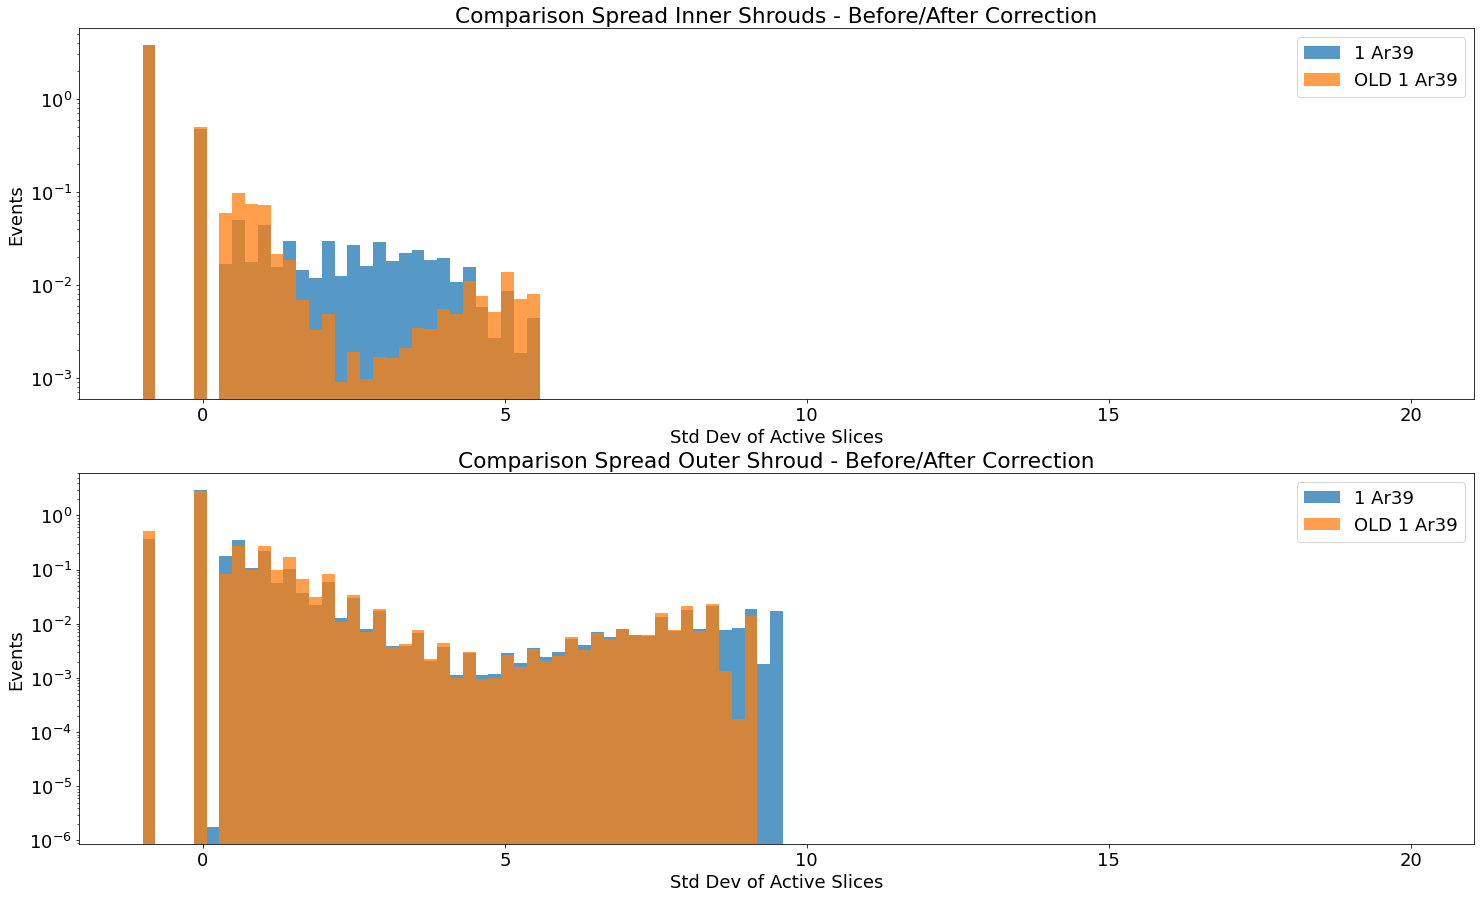

In [43]:
bins = np.linspace(-1, 20, 100)
alpha = 0.75
plt.subplot(2, 1, 1)
plt.hist(df_1ar39_feat.SpatialStd_inner, bins=bins, label="1 Ar39", density=True, alpha=alpha)
plt.hist(df_old1ar39_feat.SpatialStd_inner, bins=bins, label="OLD 1 Ar39", density=True, alpha=alpha)
plt.title("Comparison Spread Inner Shrouds - Before/After Correction")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Events")
plt.yscale("log")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(df_1ar39_feat.SpatialStd_outer, bins=bins, label="1 Ar39", density=True, alpha=alpha)
plt.hist(df_old1ar39_feat.SpatialStd_outer, bins=bins, label="OLD 1 Ar39", density=True, alpha=alpha)
plt.title("Comparison Spread Outer Shroud - Before/After Correction")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Events")
plt.yscale("log")
plt.legend()

plt.show()

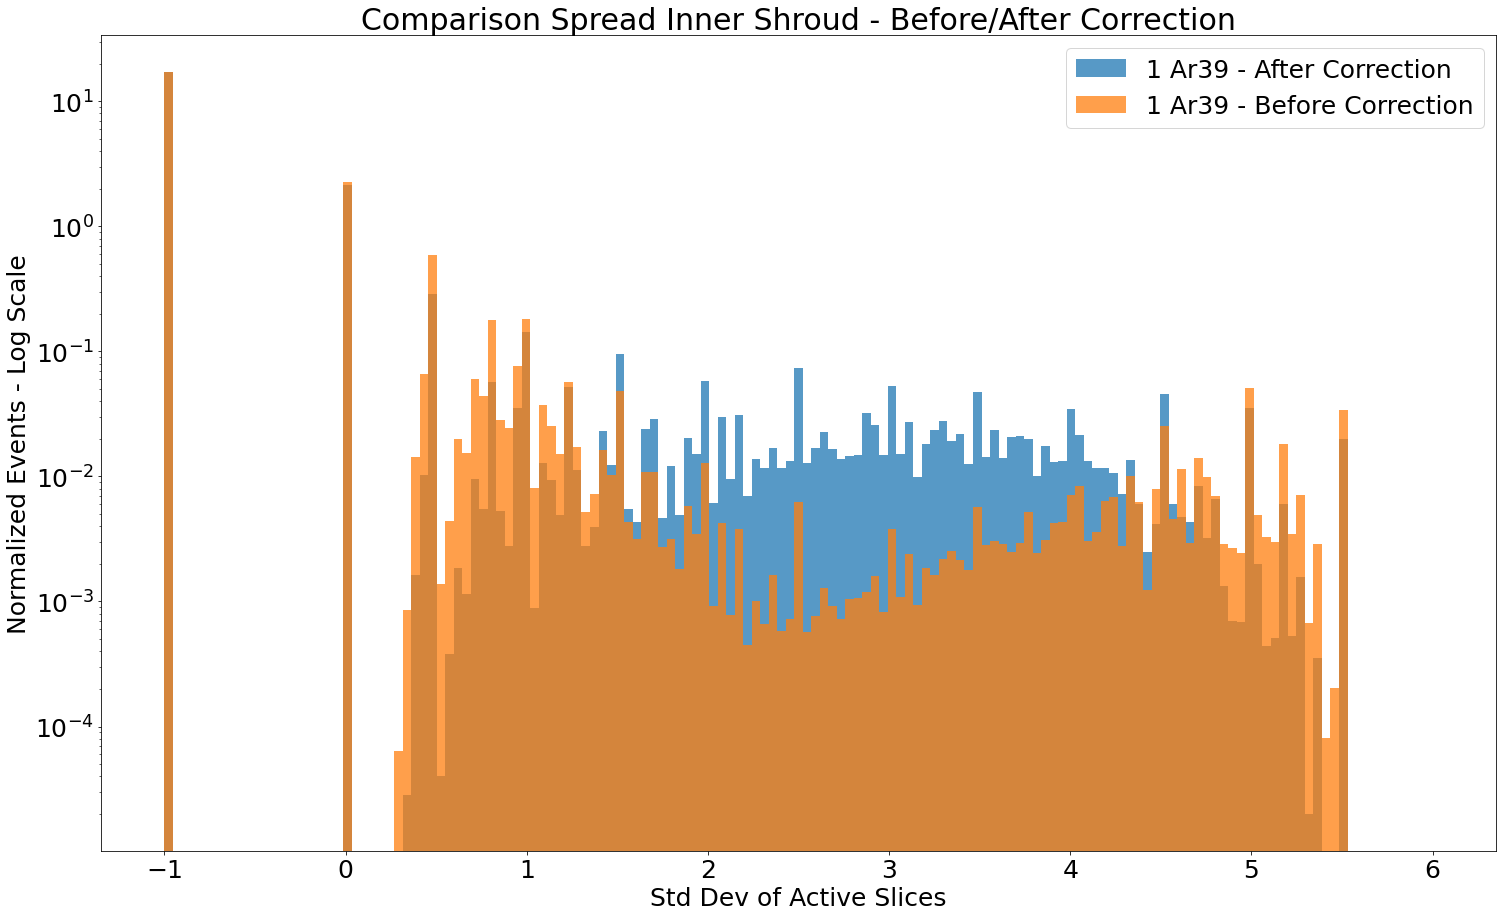

In [53]:
bins = np.linspace(-1, 6, 150)
alpha = 0.75
plt.hist(df_1ar39_feat.SpatialStd_inner, bins=bins, label="1 Ar39 - After Correction", density=True, alpha=alpha)
plt.hist(df_old1ar39_feat.SpatialStd_inner, bins=bins, label="1 Ar39 - Before Correction", density=True, alpha=alpha)
plt.title("Comparison Spread Inner Shroud - Before/After Correction")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Normalized Events - Log Scale")
plt.yscale("log")
plt.legend()
plt.show()

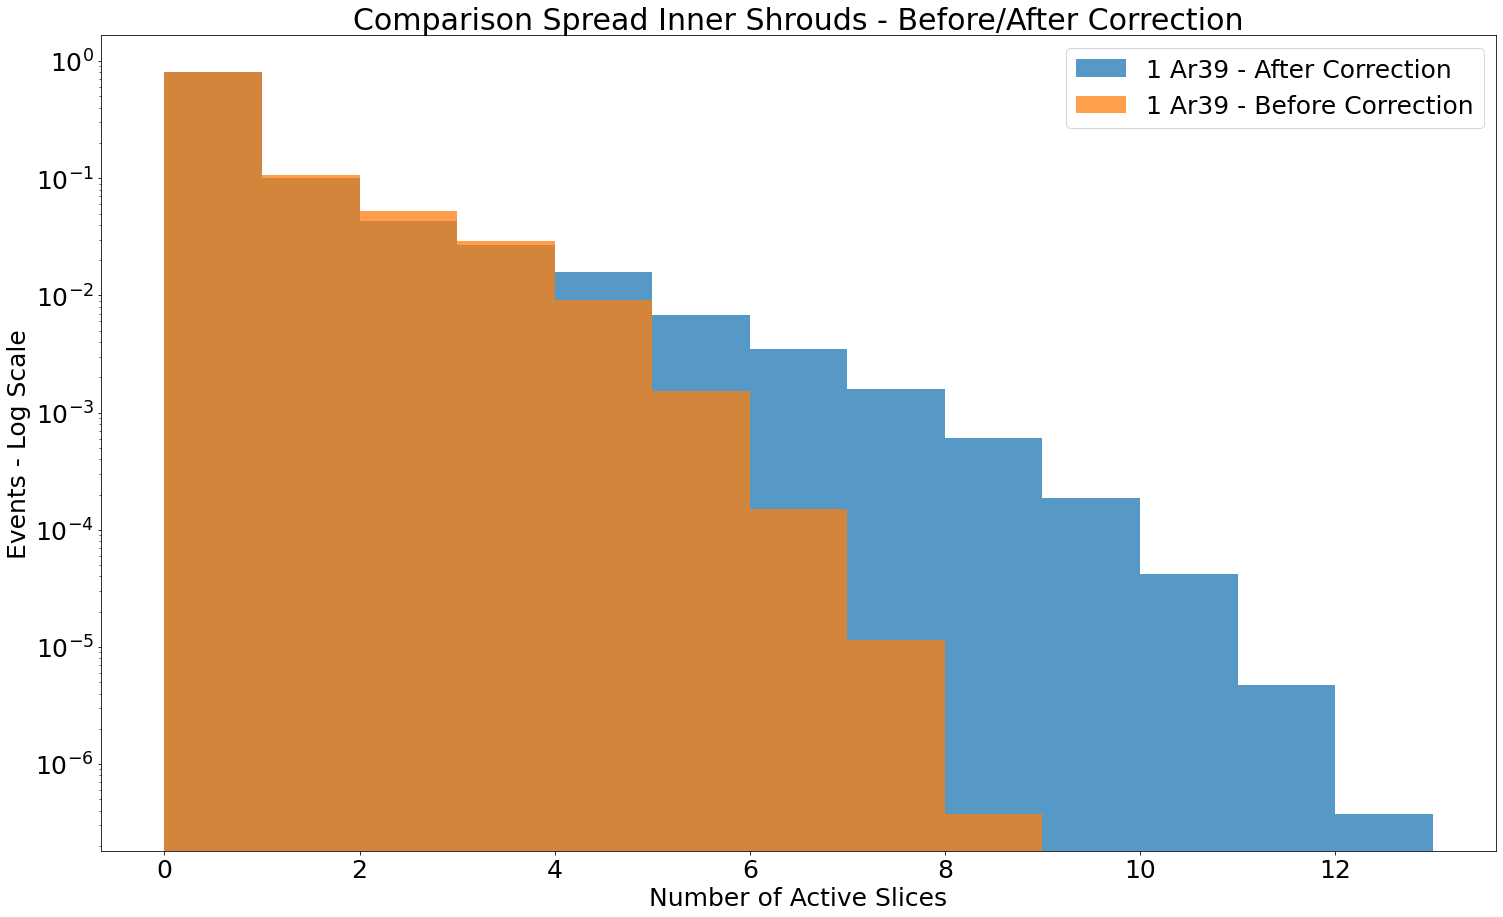

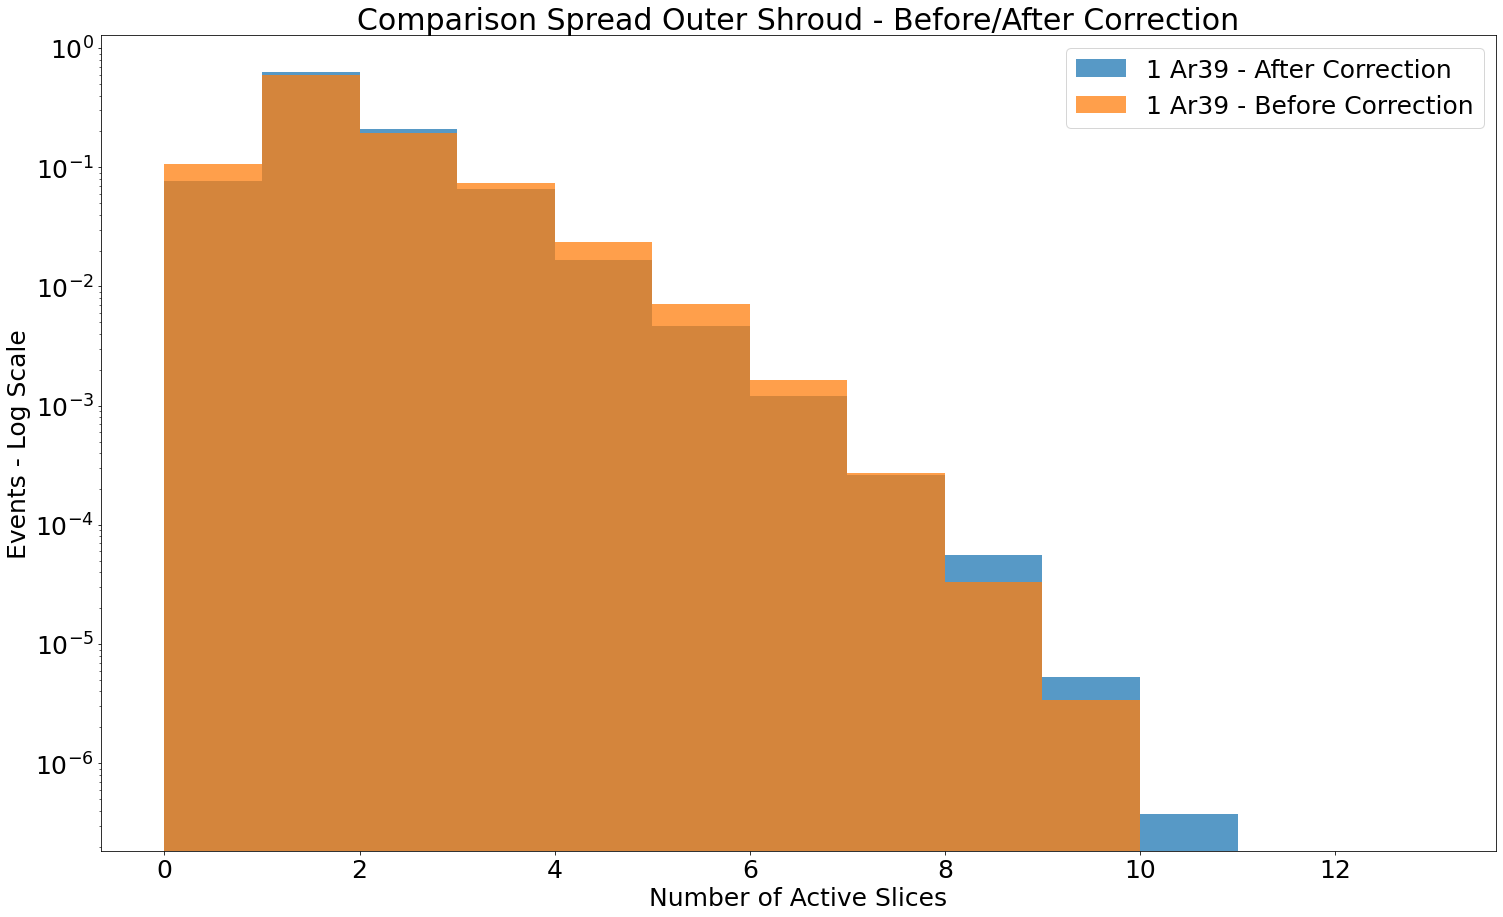

In [54]:
bins = np.linspace(0, 13, 14)
alpha = 0.75
plt.hist(df_1ar39_feat.NActiveSlices_inner, bins=bins, label="1 Ar39 - After Correction", density=True, alpha=alpha)
plt.hist(df_old1ar39_feat.NActiveSlices_inner, bins=bins, label="1 Ar39 - Before Correction", density=True, alpha=alpha)
plt.title("Comparison Spread Inner Shrouds - Before/After Correction")
plt.xlabel("Number of Active Slices")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()
plt.show()

plt.hist(df_1ar39_feat.NActiveSlices_outer, bins=bins, label="1 Ar39 - After Correction", density=True, alpha=alpha)
plt.hist(df_old1ar39_feat.NActiveSlices_outer, bins=bins, label="1 Ar39 - Before Correction", density=True, alpha=alpha)
plt.title("Comparison Spread Outer Shroud - Before/After Correction")
plt.xlabel("Number of Active Slices")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()

plt.show()

# Compare Ar39 wt Ar41 simulations

In [57]:
# Compare with old Ar39
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_08_18_2020", "Neutrons_Snapshots")

fileinprefix = "SnapshotAr41*WholeCylinder.csv"
df_ar41 = load_dataframe_from_files(dirin, fileinprefix)
df_ar41 = df_ar41[df_1ar39.columns[:-1]]

[Info] Loading 1 files wt prefix:
SnapshotAr41*WholeCylinder.csv



In [58]:
df_ar41

,eventnumber,energydeposition,pedetected,InnerSlice0,InnerSlice1,InnerSlice2,InnerSlice3,InnerSlice4,InnerSlice5,InnerSlice6,...,OuterSlice9,OuterSlice10,OuterSlice11,OuterSlice12,OuterSlice13,OuterSlice14,OuterSlice15,OuterSlice16,OuterSlice17,OuterSlice18
0,20,746.242,4,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42,6095.140,8,0,0,0,0,0,0,0,...,0,0,2,4,1,1,0,0,0,0
2,47,5375.960,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,54,6002.360,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57,3808.360,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,23513,6018.940,11,0,0,1,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
3204,23529,4474.370,41,0,0,0,0,0,0,1,...,1,3,8,5,7,3,3,1,3,0
3205,23542,5552.330,30,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3206,23543,6701.390,71,0,0,0,5,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [59]:
init = time.time()
df_whole_ar41_feat = pd.DataFrame()
df_whole_ar41_feat["PEDetected_tot"] = df_ar41.pedetected
df_whole_ar41_feat["PEDetected_inner"] = df_ar41.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_whole_ar41_feat["PEDetected_outer"] = df_ar41.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_whole_ar41_feat["SpatialStd_inner"] = df_ar41.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
df_whole_ar41_feat["SpatialStd_outer"] = df_ar41.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
df_whole_ar41_feat["NActiveSlices_inner"] = df_ar41.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_whole_ar41_feat["NActiveSlices_outer"] = df_ar41.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
print("[Info] Feature creation in {:.3f} sec".format(time.time() - init))

[Info] Feature creation in 0.427 sec


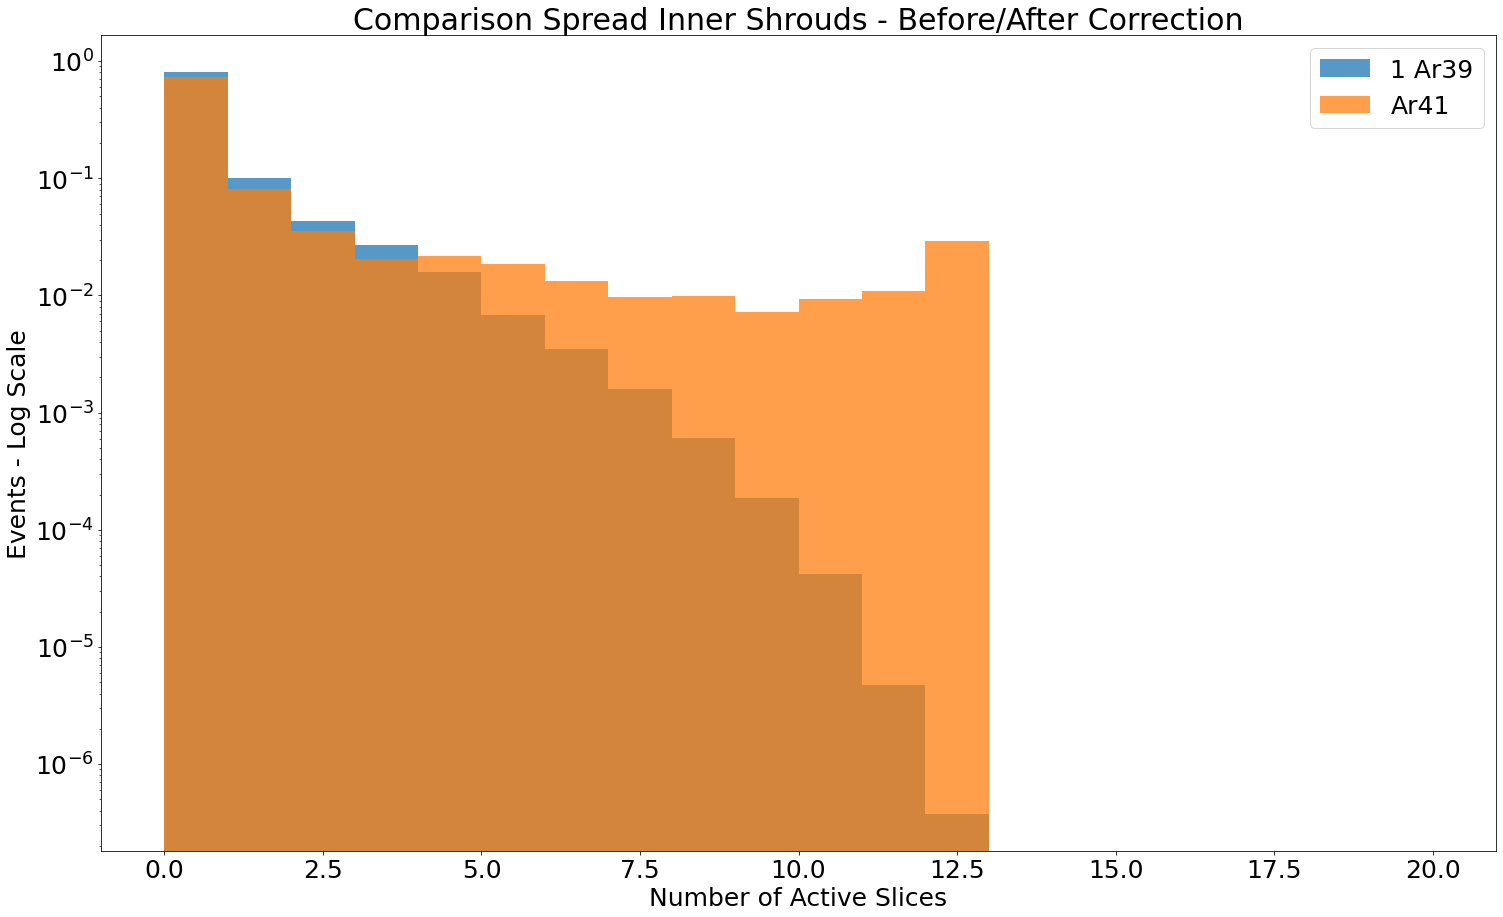

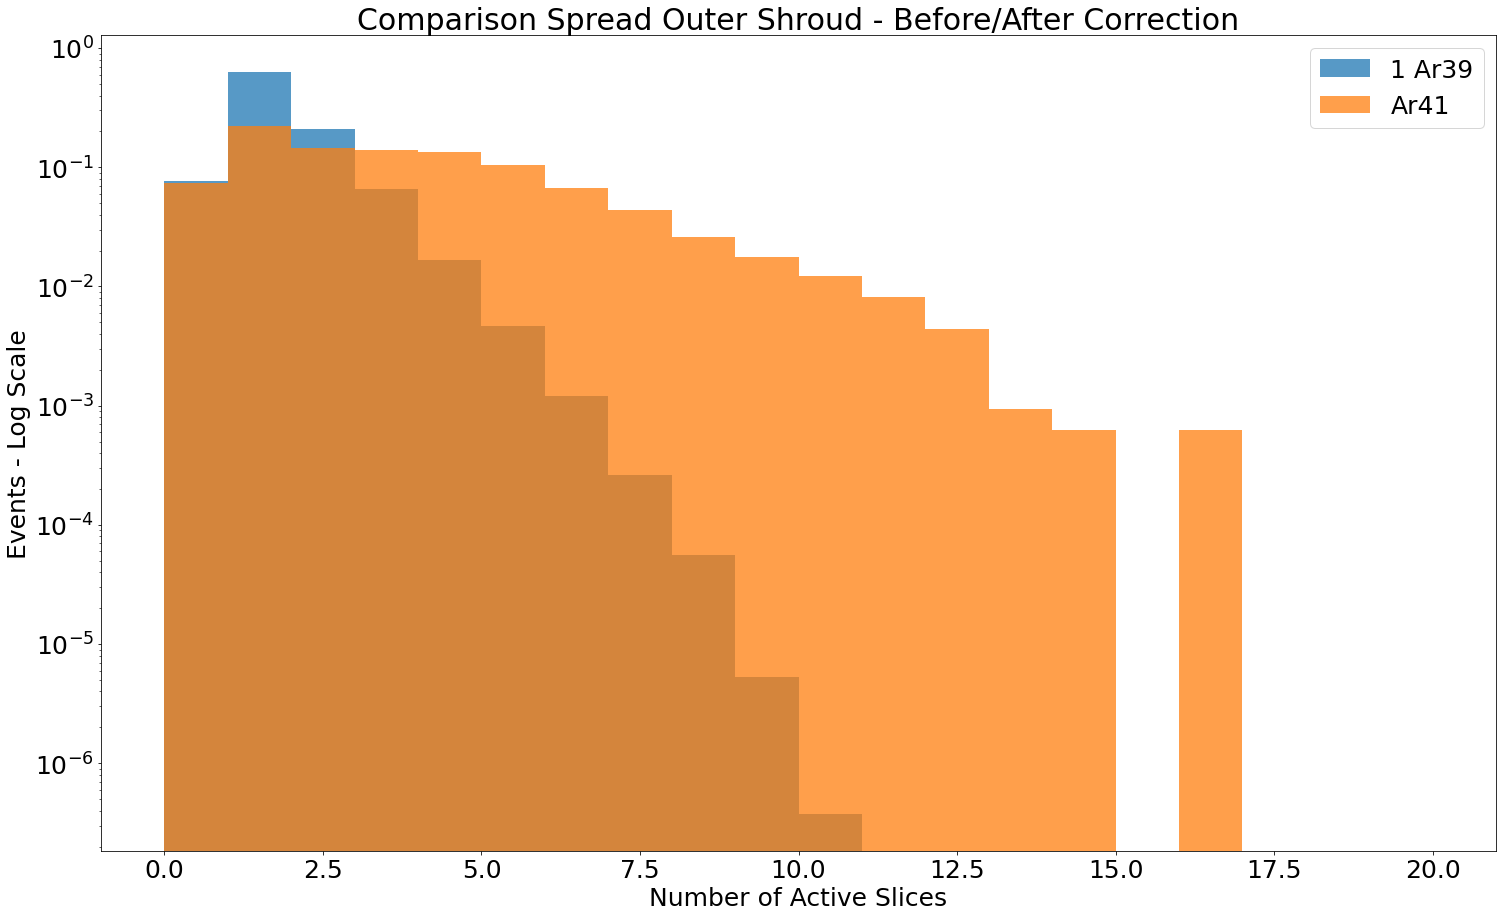

In [61]:
bins = np.linspace(0, 20, 21)
alpha = 0.75
plt.hist(df_1ar39_feat.NActiveSlices_inner, bins=bins, label="1 Ar39", density=True, alpha=alpha)
plt.hist(df_whole_ar41_feat.NActiveSlices_inner, bins=bins, label="Ar41", density=True, alpha=alpha)
plt.title("Comparison Spread Inner Shrouds - Before/After Correction")
plt.xlabel("Number of Active Slices")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()
plt.show()

plt.hist(df_1ar39_feat.NActiveSlices_outer, bins=bins, label="1 Ar39", density=True, alpha=alpha)
plt.hist(df_whole_ar41_feat.NActiveSlices_outer, bins=bins, label="Ar41", density=True, alpha=alpha)
plt.title("Comparison Spread Outer Shroud - Before/After Correction")
plt.xlabel("Number of Active Slices")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()
plt.show()

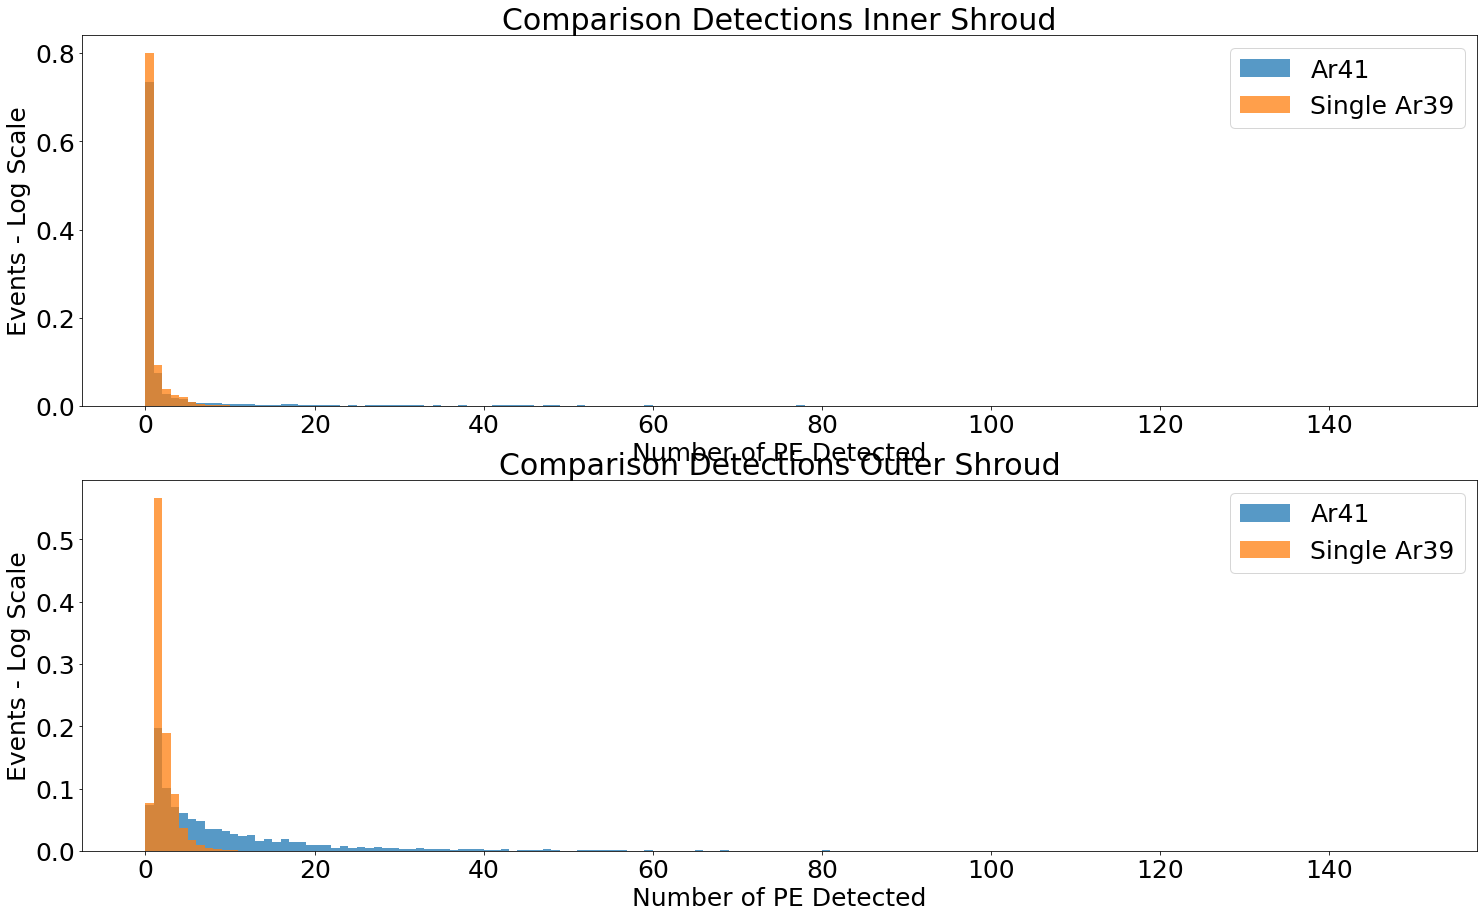

In [62]:
max_pe_lem = 150
bins = np.linspace(0, max_pe_lem, max_pe_lem+1)

plt.subplot(2, 1, 1)
plt.hist(df_whole_ar41_feat.PEDetected_inner, bins=bins, label="Ar41", density=True, alpha=alpha)
plt.hist(df_1ar39_feat.PEDetected_inner, bins=bins, label="Single Ar39", density=True, alpha=alpha)
plt.title("Comparison Detections Inner Shroud")
plt.xlabel("Number of PE Detected")
plt.ylabel("Events - Log Scale")
#plt.yscale("log")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(df_whole_ar41_feat.PEDetected_outer, bins=bins, label="Ar41", density=True, alpha=alpha)
plt.hist(df_1ar39_feat.PEDetected_outer, bins=bins, label="Single Ar39", density=True, alpha=alpha)
plt.title("Comparison Detections Outer Shroud")
plt.xlabel("Number of PE Detected")
plt.ylabel("Events - Log Scale")
#plt.yscale("log")
plt.legend()

plt.show()

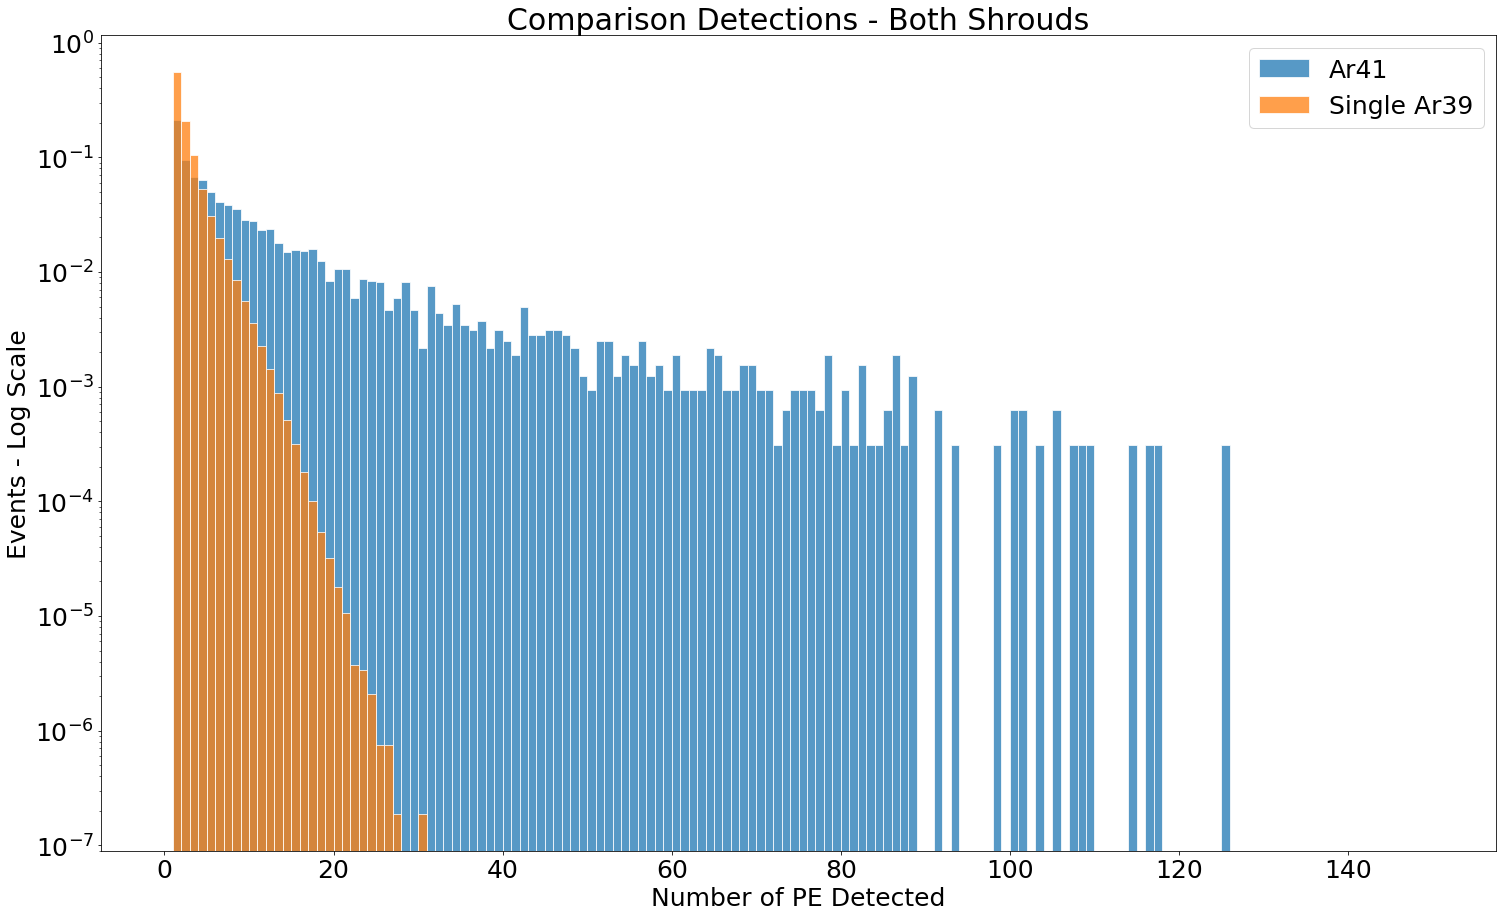

In [65]:
max_pe_lem = 150
bins = np.linspace(0, max_pe_lem, max_pe_lem+1)

plt.hist(df_whole_ar41_feat.PEDetected_tot, bins=bins, label="Ar41", density=True, alpha=alpha, edgecolor='w')
plt.hist(df_1ar39_feat.PEDetected_tot, bins=bins, label="Single Ar39", density=True, alpha=alpha, edgecolor='w')
plt.title("Comparison Detections - Both Shrouds")
plt.xlabel("Number of PE Detected")
plt.ylabel("Events - Log Scale")
plt.yscale("log")
plt.legend()

plt.show()